# Computing Lagrangian Connectivity Related Statistics

<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#000000; border-left: solid #000000 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Objective: </b> Compute some lagrangian connectivity related statistics using the file produced with OpenDrift </p>
<p style='margin-left:1em;'>
The lagrangian statistics computed here used the get_statistics.py script and can compute Probability Density Functions, Connectivity Matrices, coefficient of variance, and stranded particles statistics.
</p>
<p style='margin-left:1em;'>
Dec - 2023 | Mireya M. Montano | mireya.mmor@gmail.com
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>

## Parameters needed

- file_list (str) List of OpenDrift files to analyse
- outdir (str) path of the directory where to save the output
- id (str) Unique identifier for the experiment. i.e. 'control', 'no_stranding', 'ns' 
- PDF (boolean or arr) If True it calculates the normalised PDF. If true provide the number of bins required [120,90] for the BoP experiments
- CM (boolean) If True it calculates the normalised Connectivity Matrix. (Average if multiple files are provided).
- CV (boolean) If True it calculates the Coefficient of Variation of the Connectivity Matrix. This only works when there are multiple connectivity matrices available.
- stranded (boolean) If True it estimates different values of interest of stranding/beaching of particles.
- time_of_interest (int) Time at which the user wants to calculate all this parameters.
- time_of_interest_units (str) Units of the time of interest defined previously. i.e. 'D' for days, 'H' for hours
- patch (str) If CM is needed the user must provide a file containing the division of regions.


<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#6082B6; border-left: solid #0047AB 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>

- If multiple files are provided the average values of the requested statistics is going to be returned. This is useful if analyses of specific conditions are needed i.e., comparing connectivity in a region under El Nino vs La Nina conditions, a more climatological aspect comparing connectivity in a region under Summer vs Winter conditions 
- The Coefficient of Variation can only be calculated if multiple files are provided as the coefficient of variation is used to quantify the temporal variation in the connectivity matrices.
- To see an example of a patch file please refer to https://github.com/MireyaMMO/Lagrangian_Analyses/blob/main/notebooks/output/Patches_connectivity
</p></span>
</div>

In [1]:
from glob import glob

file_list = sorted(glob("data/notebook_02/*01_Particles_40_nb.nc"))
outdir = "output/notebook_02"
id = "control"
PDF = [120, 90]
CM = True
CV = True
stranded = True
time_of_interest = 30
time_of_interest_units = "D"
patch = "data/notebook_02/Patches_connectivity"


<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#2E8B57; border-left: solid #228B22 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
In this example we replicate the PDF, Connectivity Matrix and coefficient of variance for the January experiment as seen in Chapter 4 of Montano et al 2023. Map of regions shown below.
However to reduce the size of the repository only the years from 2010 to 2020 are added. 
</p>
<p style='margin-left:1em;'>
The outputs of 01_opendrift_run.ipynb can also be used.
</p>
<p style='margin-left:1em;'>
file_list = sorted(glob("output/notebook_01/*01_Particles_control.nc"))
</p></span>
</div>

<img src="data/notebook_02/Map_Connectivity_2.png" alt="Alternative text" />

In [2]:
from Lagrangian_Analyses.get_statistics import get_statistics

stats = get_statistics(
    file_list=file_list,
    outdir=outdir,
    id=id,
    PDF=PDF,
    CM=CM,
    CV=CV,
    stranded=stranded,
    time_of_interest=time_of_interest,
    time_of_interest_units=time_of_interest_units,
    patch=patch,
)

stats.run()

INFO:root:--- Creating output directory


--- Analysing data/notebook_02/201001_Particles_40_nb.nc
--- Analysing data/notebook_02/201101_Particles_40_nb.nc
--- Analysing data/notebook_02/201201_Particles_40_nb.nc
--- Analysing data/notebook_02/201301_Particles_40_nb.nc
--- Analysing data/notebook_02/201401_Particles_40_nb.nc
--- Analysing data/notebook_02/201501_Particles_40_nb.nc
--- Analysing data/notebook_02/201601_Particles_40_nb.nc
--- Analysing data/notebook_02/201701_Particles_40_nb.nc
--- Analysing data/notebook_02/201801_Particles_40_nb.nc
--- Analysing data/notebook_02/201901_Particles_40_nb.nc
--- Analysing data/notebook_02/202001_Particles_40_nb.nc
--- Calculating the average of desired variables
--- Saving PDF associated parameters as output/notebook02PDF_control.p 
 - normalised PDF (n_PDF) 
 - bin edges (xedges, yedges)
--- Saving Connectivity Matrix associated parameters as output/notebook02/CM_control.p 
 - normalised CM
--- Adding Connectivity Matrix associated parameters to output/notebook02/CM_control.p 
 -

## Plotting PDF


/var/folders/sx/6bb2m6dd3z1g67b_1s08w9rc0000gn/T/ipykernel_85094/4227476799.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_xticklabels(["{:.1f}".format(i) for i in cb.get_ticks()])


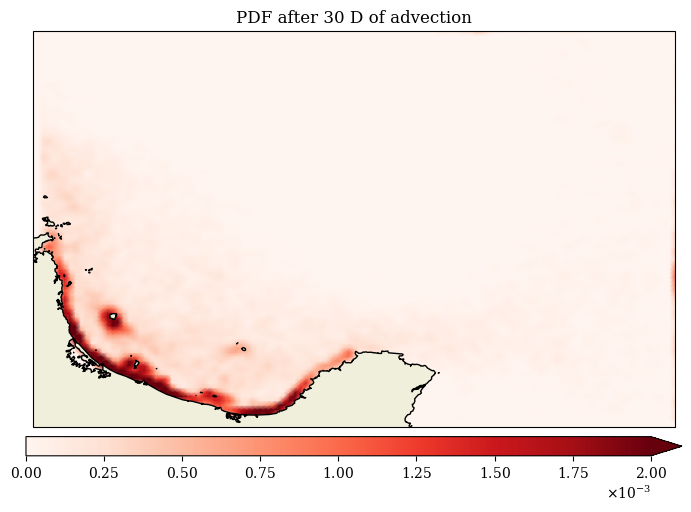

In [3]:
import pickle
from Lagrangian_Analyses.utils import *
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
cmap = get_colourmap("Reds")

nPDF, xedges, yedges = pickle.load(open(f"{outdir}/PDF_{id}.p", "rb"))
projection = ccrs.PlateCarree(central_longitude=180)
pc = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4.8))
ax = fig.add_subplot(1, 1, 1, projection=projection)
f = cfeature.GSHHSFeature(scale="high", levels=[1])
ax.add_geometries(
    f.geometries(),
    pc,
    facecolor=cfeature.COLORS["land"],
    edgecolor="black",
)
corners = [xedges.min(), xedges.max(), yedges.min(), yedges.max()]
ax.set_extent(corners, crs=pc)
c = ax.pcolormesh(
    xedges, yedges, nPDF, cmap=cmap, vmin=0, vmax=2e-3, transform=pc, shading="gouraud"
)
ax.set_title(f"PDF after {time_of_interest} {time_of_interest_units} of advection")
norm = mpl.colors.Normalize(vmin=0, vmax=2e-3)
plt.subplots_adjust(
    left=0.04, bottom=0.15, right=0.98, top=0.975, hspace=0.01, wspace=0.01
)
cax = plt.axes([0.1, 0.09, 0.82, 0.04])
fmt = mpl.ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
cb = fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap=cmap),
    extend="max",
    cax=cax,
    orientation="horizontal",
    format=fmt,
)
cb.ax.set_xticklabels(["{:.1f}".format(i) for i in cb.get_ticks()])
# cb.set_label('Control PDF',fontsize=10)
cb.ax.yaxis.set_offset_position("left")
cb.update_ticks()

## Plotting Connectivity Matrix and coefficient of variance


<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#E37383; border-left: solid #9F2B68 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
The last column of the Connectiviy Matrix (sink) refers to the particles that were not located in any of the previously defined regions
</p></span>
</div>

Text(0.5, 1.0, 'Connectivity Matrix (%) after 30 D of advection')

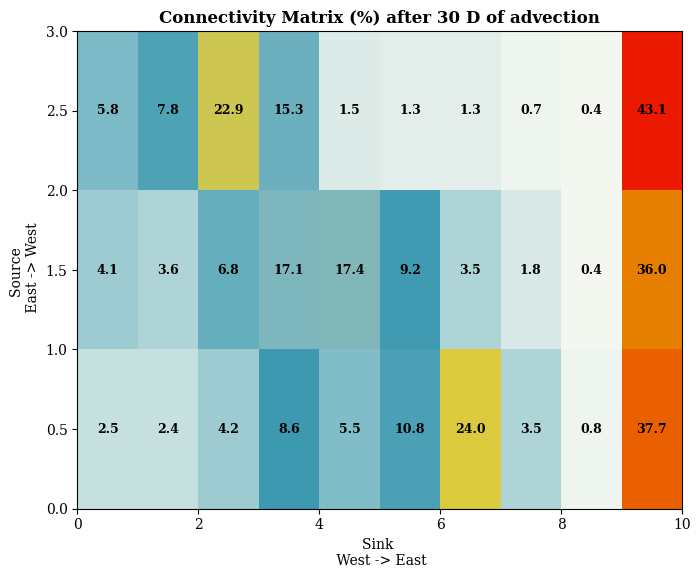

In [4]:
import pickle
from Lagrangian_Analyses.utils import *
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
cmap = get_colourmap("Zissou")

CM, CV = pickle.load(open(f"{outdir}/CM_{id}.p", "rb"))
X = np.arange(0.5, CM.shape[0] + 0.5, 1)
Y = np.arange(0.5, CM.shape[1] + 0.5, 1)
fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(1, 1, 1)
CM = CM * 100  # percentage
c1 = ax.pcolormesh(Y, X, CM, vmin=0.1, vmax=50, cmap=cmap)
cmap.set_under("gray", 0.2)
for ii in range(len(Y)):
    for jj in range(len(X)):
        if CM[jj, ii] == 0:
            ax.text(
                Y[ii],
                X[jj],
                " ",
                horizontalalignment="center",
                verticalalignment="center",
                weight="bold",
                fontsize=9,
            )
        else:
            ax.text(
                Y[ii],
                X[jj],
                "%.1f" % CM[jj, ii],
                horizontalalignment="center",
                verticalalignment="center",
                weight="bold",
                fontsize=9,
            )

ax.set_ylabel("Source \n East -> West")
ax.set_xlabel(f"Sink \n West -> East")
# ax.invert_yaxis()
ax.set_title(
    f"Connectivity Matrix (%) after {time_of_interest} {time_of_interest_units} of advection",
    weight="bold",
)

Text(0.5, 1.0, 'Coefficient of Variance after 30 D of advection')

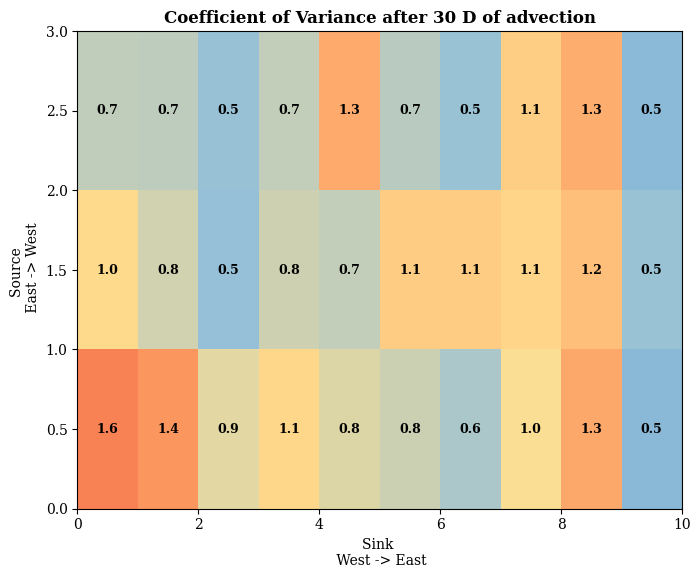

In [5]:
import pickle
from Lagrangian_Analyses.utils import *
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
cmap = get_colourmap("BlueYellowRed")
fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(1, 1, 1)
c1 = ax.pcolormesh(Y, X, CV, vmin=0, vmax=2, cmap=cmap)

cmap.set_under("gray", 0.2)
for ii in range(len(Y)):
    for jj in range(len(X)):
        if CV[jj, ii] == 0 or np.isnan(CV[jj, ii]):
            ax.text(
                Y[ii],
                X[jj],
                " ",
                horizontalalignment="center",
                verticalalignment="center",
                weight="bold",
                fontsize=9,
            )
        else:
            ax.text(
                Y[ii],
                X[jj],
                "%.1f" % CV[jj, ii],
                horizontalalignment="center",
                verticalalignment="center",
                weight="bold",
                fontsize=9,
            )

ax.set_ylabel("Source \n East -> West")
ax.set_xlabel(f"Sink \n West -> East")
# ax.invert_yaxis()
ax.set_title(
    f"Coefficient of Variance after {time_of_interest} {time_of_interest_units} of advection",
    weight="bold",
)

## Stranding/Beaching data

In [6]:
(
    avg_duration,
    norm_avg_particles_stranded,
    duration_before_stranding,
    lon_stranding,
    lat_stranding,
    om_stranding,
) = pickle.load(open(f"{outdir}/Stranded_particles_data_{id}.p", "rb"))

In [7]:
from tabulate import tabulate

print(
    tabulate(
        [
            ["Average duration of particles before stranding",
                f"{avg_duration} hours"],
            [
                "Percentage of stranded particles",
                np.round(norm_avg_particles_stranded * 100, 2),
            ],
        ],
        headers=[
            f"Parameters after {time_of_interest} {time_of_interest_units}",
            "Value",
        ],
        tablefmt="fancy_grid",
    )
)

╒════════════════════════════════════════════════╤═════════════╕
│ Parameters after 30 D                          │ Value       │
╞════════════════════════════════════════════════╪═════════════╡
│ Average duration of particles before stranding │ 180.0 hours │
├────────────────────────────────────────────────┼─────────────┤
│ Percentage of stranded particles               │ 36.7        │
╘════════════════════════════════════════════════╧═════════════╛



<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#E49B0F; border-left: solid #FDDA0D 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
With the lon_stranding, lat_stranding and om_stranding parameters it can be identified the percentage of particles stranded from each location if this information is of interest.
This information can complement the connectivity matrix and PDF data
</p></span>
</div>
